# **Appliances Energy Prediction :**

 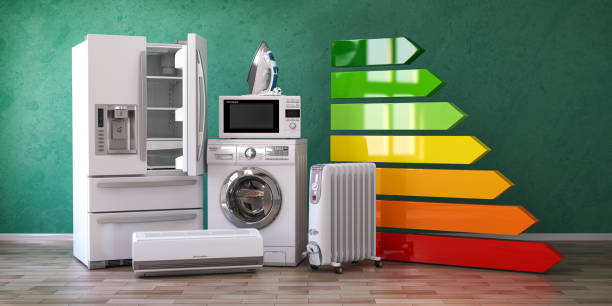

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.pipeline import Pipeline

In [ ]:
import pandas as pd

#Load the dataset

df = pd.read_csv("/content/drive/MyDrive/energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [ ]:
df.shape

(19735, 29)

In [ ]:
# Display the info of the dataset
print(df.info())

# Check column data types
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

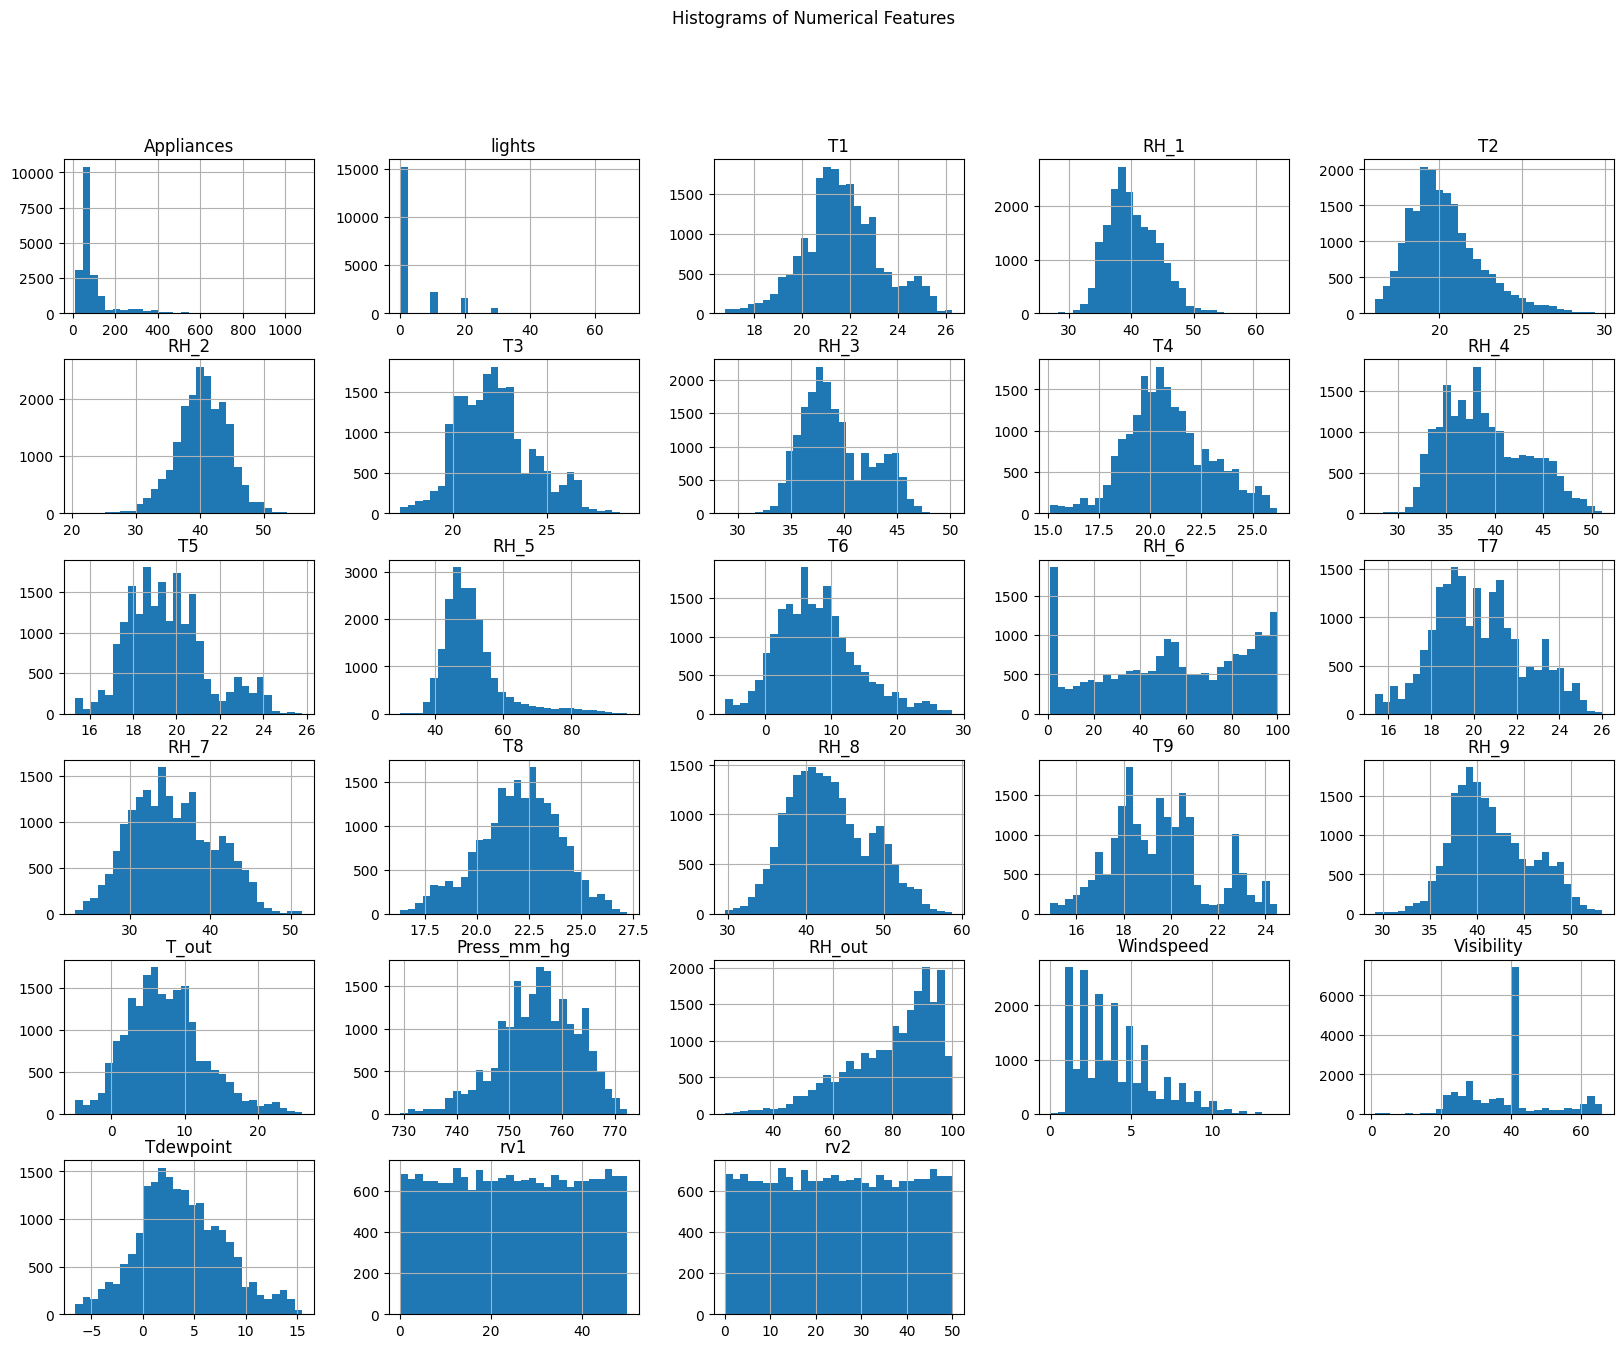

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features")
plt.show()


Axes:

The x-axis of each subplot represents the range of values for a specific feature.
The y-axis represents the frequency (or count) of data points falling within each bin.

Features:

Each histogram corresponds to a specific numerical column in your dataset (e.g., T1, RH_1, T_out, etc.).
These are plotted to visualize the data distribution for each feature.
Insights from Distributions:

Normally Distributed Features:
Features such as T1, T2, RH_3, and Tdewpoint exhibit a bell-shaped curve, indicating that their values are approximately normally distributed.

Right-Skewed Features:
Features like lights, Appliances, and Windspeed are right-skewed, meaning they have a longer tail on the right side (higher values are less frequent).

Uniformly Distributed Features:
Some features, such as rv1 and rv2, appear to have a nearly uniform distribution, with values spread evenly across the range.

Multimodal Features:
Features like T9 and RH_out show multiple peaks, indicating that the data might belong to multiple groups or clusters.

Outliers:
Features such as Visibility show extreme peaks or isolated points, which could represent outliers in the dataset.


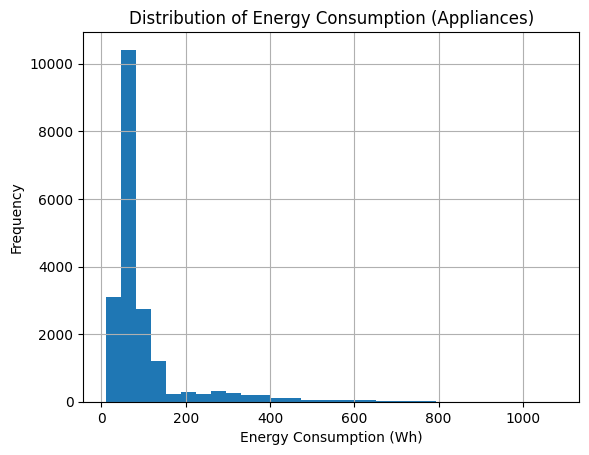

In [ ]:
import matplotlib.pyplot as plt

# Histogram for the target variable
df['Appliances'].hist(bins=30)
plt.title('Distribution of Energy Consumption (Appliances)')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()


X-axis (Energy Consumption in Wh):

This represents the energy consumption values for appliances, measured in watt-hours (Wh).

Y-axis (Frequency):

The y-axis shows the number of occurrences (frequency) for each range of energy consumption.

Skewed Distribution:

The distribution is highly right-skewed.
Most data points are concentrated on the left side, with energy consumption values primarily in the range of 0 to 200 Wh.
Very few instances have energy consumption exceeding 400 Wh, forming a long tail on the right.

Peaks and Concentration:

A significant peak is observed around 0-100 Wh, indicating that most appliances consume relatively low amounts of energy.
A sharp decline in frequency is visible as energy consumption increases.

Insights and Considerations:
Energy Usage Patterns:

This skewed pattern suggests that most appliances in the dataset operate with low energy consumption, and high consumption values are rare.

Outliers:

The long tail indicates the presence of outliers or rare events where appliances consume unusually high amounts of energy. These might need further investigation.

Feature Transformation:

Since the data is right-skewed, applying a logarithmic transformation or another normalization technique might help to reduce skewness and improve model performance, especially for regression tasks.

Modeling Implications:

Skewed data can affect model predictions, particularly for algorithms sensitive to outliers (e.g., linear regression). Transforming the target variable (Appliances) could improve accuracy.


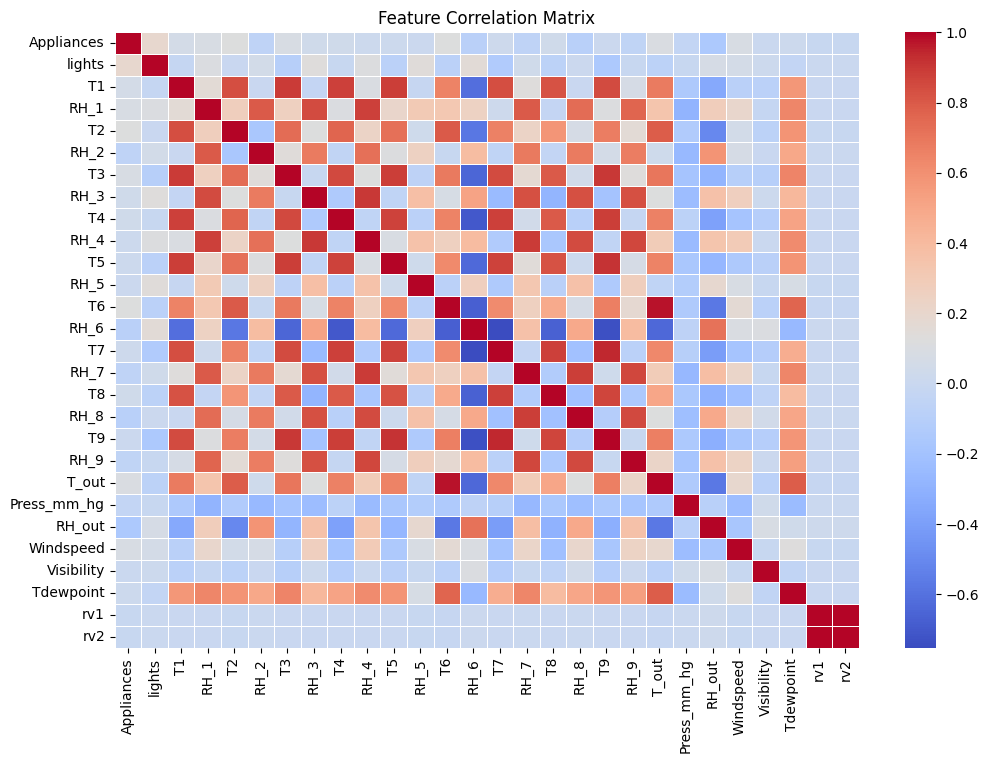

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numerical_df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()



This heatmap represents the correlation matrix of features in your dataset, visualizing the relationships between numerical variables. Here's an explanation:

What Does It Show?
Correlation Coefficients:

Each cell in the matrix represents the Pearson correlation coefficient between two features.
The values range from -1 to 1:
1: Perfect positive correlation (as one variable increases, the other increases).
-1: Perfect negative correlation (as one variable increases, the other decreases).
0: No correlation.
Color Coding:

Red: Strong positive correlation (close to 1).
Blue: Strong negative correlation (close to -1).
White/Neutral: Weak or no correlation (close to 0).
Key Observations:

Target Variable (Appliances):

Look at the first row (or column) to understand how Appliances correlates with other features.
Features with higher correlations to Appliances are likely to be important predictors.
Highly Correlated Features:

Some pairs of features are strongly correlated (e.g., T1 and T2 or rv1 and rv2).
These might indicate multicollinearity, which can affect models like linear regression.
Negatively Correlated Features:

Some features show negative correlations with others (e.g., RH_out and T_out).
These relationships might highlight inverse dependencies.
Uncorrelated Features:

Features with low or near-zero correlation (e.g., lights and Windspeed) are less likely to influence one another.




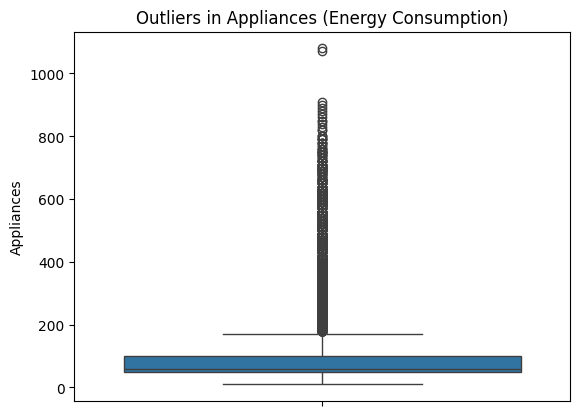

In [ ]:
sns.boxplot(df['Appliances'])
plt.title('Outliers in Appliances (Energy Consumption)')
plt.show()


In [ ]:

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)





Missing Values in Each Column:
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [ ]:
num_cols = df.select_dtypes(include='number').columns
print("Total Numerical Features:",num_cols.shape)
print("Numeric Features:",num_cols)

Total Numerical Features: (28,)
Numeric Features: Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
print("Total Categorical Features:",cat_cols.shape)
print("Categorical Features:",cat_cols)


Total Categorical Features: (1,)
Categorical Features: Index(['date'], dtype='object')


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()


,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [ ]:
# Calculate Q1, Q3, and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
Appliances     2138
lights         4483
T1              515
RH_1            146
T2              546
RH_2            235
T3              217
RH_3             15
T4              186
RH_4              0
T5              179
RH_5           1330
T6              515
RH_6              0
T7                2
RH_7             42
T8               71
RH_8             17
T9                0
RH_9             21
T_out           436
Press_mm_hg     219
RH_out          239
Windspeed       214
Visibility     2522
Tdewpoint        10
rv1               0
rv2               0
dtype: int64


High Number of Outliers:

Appliances (2138): The target variable has many outliers. This might indicate highly varying energy consumption patterns.
lights (4483): A significant number of outliers, suggesting extreme or inconsistent lighting usage.
Visibility (2522): Large variation in visibility readings might need to be addressed.
Moderate Number of Outliers:

Features like T1, T2, T6, RH_5, T_out, and RH_out have a moderate number of outliers. These might represent unusual environmental conditions or sensor errors.
Few or No Outliers:

RH_4, RH_6, T9, rv1, rv2: These features have zero or very few outliers, suggesting relatively stable or consistent data for these variables.

In [ ]:
df.shape

(19735, 29)

In [ ]:
# Cap outliers to the threshold values (IQR method)
df[num_cols] = df[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Shape after capping outliers:", df[num_cols].shape)

Shape after capping outliers: (19735, 28)


The shape of the dataset after capping outliers is (19735, 28):

Rows (19735): This indicates the number of observations (samples) in the dataset. Outlier capping typically doesn't remove rows but adjusts the extreme values within the existing rows.

Columns (28): The number of features remains the same, suggesting no features were removed during the outlier capping process.



In [ ]:
skewness = df[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)

Skewness of Numeric Columns:
 Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534273
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239374
rv1            0.004945
rv2            0.004945
dtype: float64

No Skewness:
 T1             0.120917
RH_1           0.465774
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8

The provided skewness analysis divides the columns into three categories based on their skewness values:

1. No Skewness (Approximately Symmetrical)
These columns have skewness values close to 0 (between -0.5 and 0.5), indicating that their distributions are approximately symmetrical.
Columns:
T1, RH_1, RH_2, T3, RH_3, T4, RH_4, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, Press_mm_hg, Visibility, Tdewpoint, rv1, rv2
2. Moderate Skewness
These columns have skewness values in the range of 0.5 to 1 (or -0.5 to -1). Their distributions are somewhat skewed but not highly so.
Columns:
T2, T5, T6, T_out, RH_out, Windspeed
3. High Skewness
These columns have skewness values greater than 1 (or less than -1). Their distributions are highly skewed.
Columns:
Appliances, lights, RH_5


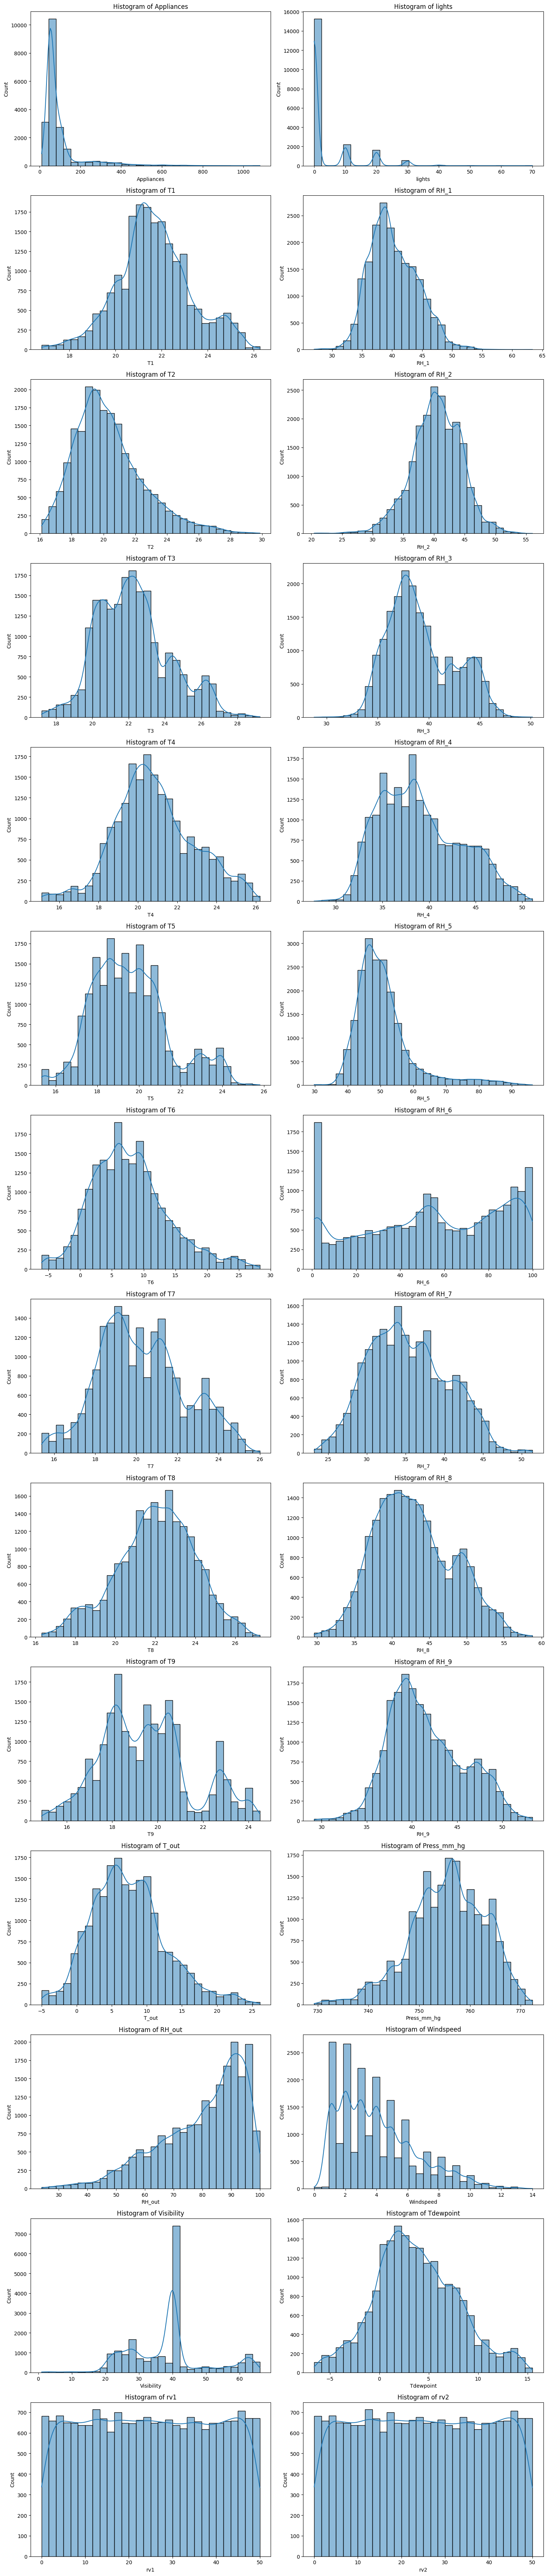

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math



num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate number of columns and rows dynamically
n_cols = 2  # Number of columns per row
n_rows = math.ceil(len(num_cols) / n_cols)  # Calculate the required number of rows

# Create a figure with the calculated size
plt.figure(figsize=(15, n_rows * 5))  # Adjust the height dynamically

# Plot histograms for all numerical columns
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust subplot position dynamically
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


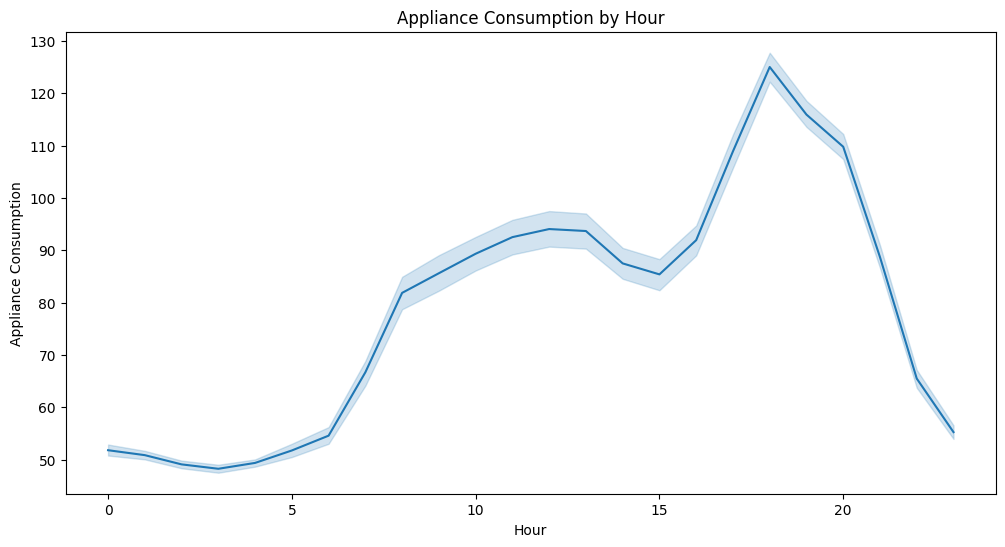

In [ ]:
df['hour'] = pd.to_datetime(df['date']).dt.hour

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='Appliances', data=df)
plt.title('Appliance Consumption by Hour')
plt.xlabel('Hour')
plt.ylabel('Appliance Consumption')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

 #Label Encoder

label_encoder = LabelEncoder()

# Encode the 'Category' column
df['Appliances_encoded'] = label_encoder.fit_transform(df['Appliances'])

print(df.head())


                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...   RH_9     T_out  Press_mm_hg  RH_out  \
0  19.79  44.730000  19.000000  ...  45.53  6.600000        733.5    92.0   
1  19.79  44.790000  19.000000  ...  45.56  6.483333        733.6    92.0   
2  19.79  44.933333  18.926667  ...  45.50  6.366667        733.7    92.0   
3  19.79  45.000000  18.890000  ...  45.40  6.250000        733.8    92.0   
4  19.79  45.000000  18.890000  ...  45.40  6.133333        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1    

 Appliances seems to be a numerical column, not categorical. Using LabelEncoder here might not be appropriate because it assumes that Appliances is a categorical feature with distinct classes.

 The unique values in the Appliances column were treated as distinct classes by LabelEncoder.
For example:
60 is encoded as 5.
50 is encoded as 4.
The mapping depends on the unique values in the Appliances column, and these mappings will not preserve the numerical meaning of the original data.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt



# Drop 'date' column if present
if 'date' in df.columns:
    df = df.drop(columns=['date'])

# Features and Target
X = df.drop(columns=['Appliances'], axis=1)  # Exclude target column
y = df['Appliances']  # Target column

# Keep only numeric features
X = X.select_dtypes(include=[np.number])

# --- Random Forest Feature Importance ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Combine feature names and importances into a DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop Features by Random Forest Importance:\n", importance_df)




Top Features by Random Forest Importance:
                Feature    Importance
27  Appliances_encoded  9.997371e-01
0               lights  1.531672e-04
11                  T6  1.762726e-05
2                 RH_1  1.729197e-05
10                RH_5  1.300875e-05
7                   T4  8.752613e-06
1                   T1  7.114474e-06
21              RH_out  6.647434e-06
19               T_out  6.510305e-06
20         Press_mm_hg  6.120952e-06
9                   T5  4.526935e-06
24           Tdewpoint  3.879385e-06
12                RH_6  3.592952e-06
5                   T3  2.561855e-06
15                  T8  2.119122e-06
25                 rv1  1.916175e-06
26                 rv2  1.492868e-06
6                 RH_3  1.490517e-06
16                RH_8  9.768706e-07
22           Windspeed  6.745636e-07
13                  T7  6.223804e-07
18                RH_9  5.837565e-07
8                 RH_4  5.118554e-07
3                   T2  4.842615e-07
14                RH_7  4.81779

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop('Appliances', axis=1)  # Features
y = df['Appliances']  # Target variable

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")


Training set features shape: (15788, 28)
Testing set features shape: (3947, 28)
Training set target shape: (15788,)
Testing set target shape: (3947,)


Features (X):

Training set: (15788, 28)
This means you have 15,788 samples (rows) with 28 features (columns).
Testing set: (3947, 28)
This means you have 3,947 samples for testing with the same 28 features.

Target (y):

Training set: (15788,)
The target variable has 15,788 corresponding values for training.
Testing set: (3947,)
The target variable has 3,947 corresponding values for testing.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Drop 'date' column and prepare features (X) and target (y)
if 'date' in df.columns:
    df = df.drop(columns=['date'])

X = df.drop(columns=['Appliances'])  # Features
y = df['Appliances']  # Target

# Select numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

#Standardization
standard_scaler = StandardScaler()
X_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(X[numerical_features]), columns=numerical_features)

# Display the first few rows of scaled data

print("\nStandardized Data:\n", X_standard_scaled.head())



Standardized Data:
      lights        T1      RH_1        T2      RH_2        T3      RH_3  \
0  3.301264 -1.118645  1.843821 -0.520411  1.073683 -1.235063  1.686130   
1  3.301264 -1.118645  1.616807 -0.520411  1.057097 -1.235063  1.704566   
2  3.301264 -1.118645  1.517959 -0.520411  1.033550 -1.235063  1.748608   
3  4.561378 -1.118645  1.459321 -0.520411  1.024540 -1.235063  1.769092   
4  4.561378 -1.118645  1.526336 -0.520411  1.009797 -1.235063  1.769092   

         T4      RH_4        T5  ...      RH_9     T_out  Press_mm_hg  \
0 -0.908217  1.506438 -1.314903  ...  0.958136 -0.152647    -2.976328   
1 -0.908217  1.604528 -1.314903  ...  0.965363 -0.174588    -2.962813   
2 -0.944115  1.580918 -1.314903  ...  0.950910 -0.196529    -2.949298   
3 -0.962063  1.542526 -1.314903  ...  0.926821 -0.218470    -2.935783   
4 -0.962063  1.497991 -1.296832  ...  0.926821 -0.240411    -2.922268   

    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  \
0  0.82208   1.207694

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target (y)
X = df.drop(columns=['Appliances'])  # Features
y = df['Appliances']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
     "MLP Regressor": MLPRegressor(max_iter=1000, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}\n")

# Display results
print("Model Performance Summary:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")


Training MLP Regressor...
MLP Regressor - MSE: 2.3083, R2: 0.9998

Training Random Forest Regressor...
Random Forest Regressor - MSE: 0.0949, R2: 1.0000

Training Linear Regression...
Linear Regression - MSE: 0.0904, R2: 1.0000

Training Gradient Boosting...
Gradient Boosting - MSE: 0.1096, R2: 1.0000

Training AdaBoost Regressor...
AdaBoost Regressor - MSE: 109.1784, R2: 0.9891

Model Performance Summary:
MLP Regressor: MSE = 2.3083, R2 = 0.9998
Random Forest Regressor: MSE = 0.0949, R2 = 1.0000
Linear Regression: MSE = 0.0904, R2 = 1.0000
Gradient Boosting: MSE = 0.1096, R2 = 1.0000
AdaBoost Regressor: MSE = 109.1784, R2 = 0.9891


MLP Regressor: Although it has a high R² value (0.9998), the Mean Squared Error (MSE) is slightly higher than others (2.3083), which might indicate that it is overfitting or there could be room for improvement in its configuration.

Random Forest Regressor: It performs exceptionally well with an MSE of 0.0949 and R² of 1.0. This suggests that the model is highly accurate, and the decision tree ensemble method is well suited for this data.

Linear Regression and Gradient Boosting: Both also show very strong performance with MSE values around 0.09 and R² values of 1.0, indicating they fit the data well.

AdaBoost Regressor: This model has the highest MSE (109.1784) and a lower R² (0.9891). This could indicate that AdaBoost is either sensitive to the data noise or might not be the best fit for this problem compared to the other models.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate and display metrics for a given model
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}\n")

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, name)



Evaluating MLP Regressor...
Model: MLP Regressor
  Mean Absolute Error (MAE): 1.4282
  Mean Squared Error (MSE): 2.3083
  Root Mean Squared Error (RMSE): 1.5193
  R² Score: 0.9998

Evaluating Random Forest Regressor...
Model: Random Forest Regressor
  Mean Absolute Error (MAE): 0.0135
  Mean Squared Error (MSE): 0.0949
  Root Mean Squared Error (RMSE): 0.3080
  R² Score: 1.0000

Evaluating Linear Regression...
Model: Linear Regression
  Mean Absolute Error (MAE): 0.1429
  Mean Squared Error (MSE): 0.0904
  Root Mean Squared Error (RMSE): 0.3007
  R² Score: 1.0000

Evaluating Gradient Boosting...
Model: Gradient Boosting
  Mean Absolute Error (MAE): 0.0630
  Mean Squared Error (MSE): 0.1096
  Root Mean Squared Error (RMSE): 0.3311
  R² Score: 1.0000

Evaluating AdaBoost Regressor...
Model: AdaBoost Regressor
  Mean Absolute Error (MAE): 7.5257
  Mean Squared Error (MSE): 109.1784
  Root Mean Squared Error (RMSE): 10.4488
  R² Score: 0.9891



MLP Regressor:

MAE: 1.4282
MSE: 2.3083
RMSE: 1.5193
R²: 0.9998
The high MAE and RMSE values suggest that the model is not performing as well as others, even though the R² is high. This might indicate some inconsistency in predictions or potential overfitting to the training data.
Random Forest Regressor:

MAE: 0.0135
MSE: 0.0949
RMSE: 0.3080
R²: 1.0000
This model has very low MAE and MSE, indicating excellent performance with minimal error. The R² score of 1.0000 further confirms it fits the data perfectly.
Linear Regression:

MAE: 0.1429
MSE: 0.0904
RMSE: 0.3007
R²: 1.0000
Like the Random Forest, Linear Regression also shows excellent performance with very low MAE and MSE. It's an efficient model, especially when the data is linearly separable.
Gradient Boosting:

MAE: 0.0630
MSE: 0.1096
RMSE: 0.3311
R²: 1.0000
Gradient Boosting is also performing very well with low MAE and MSE, similar to the Random Forest and Linear Regression models.
AdaBoost Regressor:

MAE: 7.5257
MSE: 109.1784
RMSE: 10.4488
R²: 0.9891
AdaBoost stands out with significantly higher MAE, MSE, and RMSE compared to the other models. The R² value of 0.9891, while still good, indicates that this model is underperforming compared to the others. It may not be capturing the underlying patterns as effectively as the other regressors.

In [ ]:
# Dictionary to store evaluation results
results = {}

# Evaluate each model
for name, model in models.items():

    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Save results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

# Convert results to DataFrame for easier analysis
import pandas as pd
results_df = pd.DataFrame(results).T

# Display the results for all models
print("\nComparison of All Models:")
print(results_df)

# Find the best model based on R² score
best_model_name = results_df['R2'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

print("\nBest Model:")
print(f"  Model: {best_model_name}")
print(f"  Metrics: \n{best_model_metrics}")


Comparison of All Models:
                              MAE         MSE       RMSE        R2
MLP Regressor            1.428188    2.308292   1.519306  0.999769
Random Forest Regressor  0.013504    0.094875   0.308017  0.999991
Linear Regression        0.142909    0.090427   0.300710  0.999991
Gradient Boosting        0.063024    0.109610   0.331074  0.999989
AdaBoost Regressor       7.525750  109.178395  10.448847  0.989090

Best Model:
  Model: Linear Regression
  Metrics: 
MAE     0.142909
MSE     0.090427
RMSE    0.300710
R2      0.999991
Name: Linear Regression, dtype: float64


MLP Regressor: While the R² is high (0.9998), the MAE and RMSE indicate a less optimal fit compared to other models.
Random Forest Regressor: Excellent performance with minimal error and perfect R² (1.0).
Linear Regression: Best model in terms of balance between low error metrics (MAE, MSE, RMSE) and a perfect R² score.
Gradient Boosting: Also a strong performer but slightly behind Random Forest and Linear Regression.
AdaBoost Regressor: Has significantly higher error metrics and lower R², indicating poor performance.

Best Model: Linear Regression
MAE: 0.142909
MSE: 0.090427
RMSE: 0.300710
R²: 0.999991
Linear Regression stands out due to its low error and near-perfect R², making it the optimal choice.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define parameter distributions
ridge_params = {'alpha': np.logspace(-3, 3, 10)}  # Values between 0.001 and 1000
lasso_params = {'alpha': np.logspace(-3, 3, 10)}
elasticnet_params = {
    'alpha': np.logspace(-3, 3, 10),
    'l1_ratio': np.linspace(0.1, 0.9, 5)  # Values between 0.1 and 0.9
}

# Define features (X) and target (y)
X = df.drop('Appliances', axis=1)  # Features
y = df['Appliances']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Ridge': (Ridge(), ridge_params),
    'Lasso': (Lasso(max_iter=10000), lasso_params),
    'ElasticNet': (ElasticNet(max_iter=10000), elasticnet_params)
}

# Randomized Search for each model
best_models = {}
for name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=20,  # Limit the number of iterations
        cv=5,
        scoring='neg_mean_squared_error',
        random_state=42
    )
    random_search.fit(X_train, y_train)

    # Store the best model
    best_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")
    print(f"Best CV score for {name}: {-random_search.best_score_}")

# Evaluate the best models on the test set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Test MSE: {mse:.4f}, R²: {r2:.4f}")


Best parameters for Ridge: {'alpha': 46.41588833612773}
Best CV score for Ridge: 3.283393562852216
Best parameters for Lasso: {'alpha': 0.1}
Best CV score for Lasso: 3.280882178437023
Best parameters for ElasticNet: {'l1_ratio': 0.9, 'alpha': 0.1}
Best CV score for ElasticNet: 3.2813235481956107
Ridge Test MSE: 0.0893, R²: 1.0000
Lasso Test MSE: 0.0762, R²: 1.0000
ElasticNet Test MSE: 0.0740, R²: 1.0000


Best Parameters:
Ridge: alpha = 46.4159
Best CV score: 3.2834
Lasso: alpha = 0.1
Best CV score: 3.2809
ElasticNet: l1_ratio = 0.9, alpha = 0.1
Best CV score: 3.2813
Test Performance:
Ridge:
MSE: 0.0893
R²: 1.0000
Lasso:
MSE: 0.0762
R²: 1.0000
ElasticNet:
MSE: 0.0740
R²: 1.0000
Insights:
ElasticNet performs the best in terms of MSE (0.0740) and has a perfect R² of 1.0, making it the most accurate model among the three regularized ones.
Lasso also performs well, with slightly higher MSE than ElasticNet but still very close.
Ridge has the highest MSE of the three regularized models, though it still shows perfect R², indicating a good fit with minimal error.

In [ ]:
import joblib

# Save the ElasticNet model
joblib.dump(best_models['ElasticNet'], 'elasticnet_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [ ]:
# Load the saved model
loaded_model = joblib.load('elasticnet_model.pkl')




In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline  # Import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('model', LinearRegression())           # Linear Regression
])
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LinearRegression())])

In [ ]:
import joblib

loaded_pipeline = joblib.load('elasticnet_model.pkl')

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression  #   import statement

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train) # X_train : Independant Variables and y_train : Dependant

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

# Define the model
model = ElasticNet(alpha=0.1, l1_ratio=0.9)

# Perform 10-fold cross-validation and get the R² score
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print(f"Mean R²: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Mean R²: 0.9998
Standard Deviation: 0.0005


In [ ]:


y_unseen_pred = loaded_pipeline.predict(X_unseen)

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/energydata_complete.csv")

# Split into training and unseen data
train_data = data.iloc[:int(len(data)*0.8)]  # 80% for training
unseen_data = data.iloc[int(len(data)*0.8):]  # 20% as unseen

# Save unseen data to a new CSV file
unseen_data.to_csv("unseen_energydata.csv", index=False)

In [ ]:
# First split: Separate unseen data (20% of the dataset)
X_temp, X_unseen, y_temp, y_unseen = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Create training and testing sets from the remaining 80%
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Check the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Unseen data shape:", X_unseen.shape)

Training data shape: (11841, 28)
Testing data shape: (3947, 28)
Unseen data shape: (3947, 28)


Training Data: 11,841 samples, 28 features
Testing Data: 3,947 samples, 28 features
Unseen Data: 3,947 samples, 28 features



In [ ]:
print("Training data features:", X_train.columns)
print("Test data features:", X_test.columns)


Training data features: Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'Appliances_encoded'],
      dtype='object')
Test data features: Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2', 'Appliances_encoded'],
      dtype='object')


In [ ]:
# Separate the features (X) and target (y) for unseen data
X_unseen = unseen_data.drop('Appliances', axis=1)  # Drop the target column
y_actual = unseen_data['Appliances']             # Extract the target column


In [ ]:
# Drop the 'date' column
X_unseen = X_unseen.drop('date', axis=1)


In [ ]:
# Preprocessing steps applied to the training data should also be applied to the unseen data

# Assuming 'Appliances_encoded' was created during training:
if 'Appliances_encoded' not in unseen_data.columns:
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    unseen_data['Appliances_encoded'] = label_encoder.fit_transform(unseen_data['Appliances'])


# Separate the features (X) and target (y) for unseen data
X_unseen = unseen_data.drop('Appliances', axis=1)  # Drop the target column
y_actual = unseen_data['Appliances']             # Extract the target column

# Drop the 'date' column if it's not needed
if 'date' in X_unseen.columns:
    X_unseen = X_unseen.drop('date', axis=1)


# Ensure features are in the same order as during training:
# Assuming 'X_train' contains the correct order of features
X_unseen = X_unseen[X_train.columns]


y_unseen_pred = loaded_pipeline.predict(X_unseen)

In [ ]:
y_unseen_pred = loaded_pipeline.predict(X_unseen)

In [ ]:
unseen_data['unseen_predictions'] = y_unseen_pred

In [ ]:
#Transform the DataFrame to a csv file
unseen_data.to_csv('unseen_predictions.csv',index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)

X = data.drop('Appliances', axis=1)
y = data['Appliances']

# First split: Separate unseen data (20% of the dataset)
X_temp, X_unseen, y_temp, y_unseen = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Create training and testing sets from the remaining 80%
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


# Assuming 'y_unseen_pred' contains the predictions for the unseen data

# Save predictions along with actual values
unseen_predictions = pd.DataFrame({
    'Actual': y_unseen,
    'Predicted': y_unseen_pred
})
unseen_predictions.to_csv('Unseen.csv', index=False)
print("Predictions saved to 'Unseen.csv'.")

Predictions saved to 'Unseen.csv'.


In [ ]:
unseen_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances_encoded,unseen_predictions
15788,2016-04-30 08:20:00,370,0,21.390000,38.260000,19.133333,40.363333,22.600000,36.500000,19.290000,...,5.666667,758.233333,92.666667,1.000000,40.000000,4.533333,29.771444,29.771444,35,360.528327
15789,2016-04-30 08:30:00,590,0,21.390000,38.126667,19.200000,40.230000,22.600000,36.545000,19.356667,...,5.800000,758.300000,91.500000,1.000000,40.000000,4.500000,27.174247,27.174247,56,570.914105
15790,2016-04-30 08:40:00,320,0,21.390000,38.090000,19.263333,40.026667,22.633333,36.590000,19.390000,...,5.933333,758.366667,90.333333,1.000000,40.000000,4.466667,30.335592,30.335592,30,310.429097
15791,2016-04-30 08:50:00,310,10,21.390000,38.030000,19.530000,39.766667,22.700000,36.590000,19.463333,...,6.066667,758.433333,89.166667,1.000000,40.000000,4.433333,32.784644,32.784644,29,300.428704
15792,2016-04-30 09:00:00,260,0,21.323333,37.900000,19.730000,39.296667,22.700000,36.590000,19.500000,...,6.200000,758.500000,88.000000,1.000000,40.000000,4.400000,17.562462,17.562462,24,250.308824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,22.733333,755.200000,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,8,89.885518
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,22.600000,755.200000,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,7,79.870343
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,22.466667,755.200000,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,25,260.230207
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,22.333333,755.200000,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,40,410.513556


In [ ]:
# Predict on test data
y_pred = pipeline.predict(X_test)

In [ ]:
print("Prediction:", y_unseen_pred[0])

Prediction: 360.52832717649875


In [ ]:
print(f"Model Performance on Unseen Data:")
print(f"MAE: {mean_absolute_error(y_actual, y_unseen_pred):.2f}")
print(f"MSE: {mean_squared_error(y_actual, y_unseen_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_actual, y_unseen_pred)):.2f}")
print(f"R²: {r2_score(y_actual, y_unseen_pred):.4f}")

Model Performance on Unseen Data:
MAE: 10.32
MSE: 126.74
RMSE: 11.26
R²: 0.9847
